<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1">Import</a></span></li><li><span><a href="#Helper-plot-methods" data-toc-modified-id="Helper-plot-methods-2">Helper plot methods</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-3">Parameters</a></span></li><li><span><a href="#Material:-Encapsulated-graphene" data-toc-modified-id="Material:-Encapsulated-graphene-4">Material: Encapsulated graphene</a></span><ul class="toc-item"><li><span><a href="#rp" data-toc-modified-id="rp-4.1">rp</a></span></li><li><span><a href="#1D-field-profile" data-toc-modified-id="1D-field-profile-4.2">1D field profile</a></span></li><li><span><a href="#2D-field-profile" data-toc-modified-id="2D-field-profile-4.3">2D field profile</a></span></li></ul></li></ul></div>

# Import

In [1]:
from NearFieldOptics.Materials import *
from NearFieldOptics.Materials.material_types import *
from NearFieldOptics.Materials.TransferMatrixMedia import *
from common.baseclasses import AWA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "sio2_300nm_extracted_epsilon_cone_A=2a.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_Insulating.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_Metallic.pickle"...


# Helper plot methods

In [2]:
def plot_1d_Field(field):
    fig,axes = plt.subplots(1,3)
    plt.subplots_adjust(bottom=0.1, top=1, left = 0.1, right=2.2, wspace = 0.3)
    axes[0].plot(field.axes[0],np.real(field))
    axes[0].set_title("real")
    axes[1].plot(field.axes[0],np.imag(field))
    axes[1].set_title("imaginary")
    axes[2].plot(field.axes[0],abs(field))
    axes[2].set_title("absolute value")
    list = C._get_interface_position_list_()
    for item in list:
        axes[0].axvline(x=item*1e7,color='grey',linestyle ='--')
        axes[1].axvline(x=item*1e7,color='grey',linestyle ='--')
        axes[2].axvline(x=item*1e7,color='grey',linestyle ='--')
        
def imshow1x2(field, xRange, yRange):

    fig,axes = plt.subplots(1,3)
    plt.subplots_adjust(bottom=0.1, top=0.7, left = 0, right=2, hspace = 0.4, wspace = 0.3)

    im = axes[0].imshow(np.flipud(np.real(field)),aspect='auto', 
                        extent=[xRange.min(), xRange.max(), yRange.min(), yRange.max()],
                       cmap='bwr')
    axes[0].set_title('Real part')
    fig.colorbar(im,ax=axes[0])

    im = axes[1].imshow(np.flipud(np.imag(field)),aspect='auto', 
                        extent=[xRange.min(), xRange.max(), yRange.min(), yRange.max()],
                       cmap='bwr')
    axes[1].set_title('Imaginary part')
    fig.colorbar(im,ax=axes[1])
    
    im = axes[2].imshow(np.flipud(abs(field)),aspect='auto', 
                        extent=[xRange.min(), xRange.max(), yRange.min(), yRange.max()],
                       cmap='hot')
    axes[2].set_title('Amplitude')
    fig.colorbar(im,ax=axes[2])
    for i in range(0,3):
        axes[i].set_ylabel('z (nm)')
        axes[i].set_xlabel('x (nm)')
        list = C._get_interface_position_list_()
        for item in list:
            axes[0].axhline(y=item*1e7,color='black',linestyle ='-')
            axes[1].axhline(y=item*1e7,color='black',linestyle ='-')
            axes[2].axhline(y=item*1e7,color='white',linestyle ='-')
    

# Parameters

In [3]:
# Calculation parameters
qRangeIn = np.linspace(1,1.5e6,500)
freqIn = np.linspace(800,1100,num=600)
qRange,freq = np.meshgrid(qRangeIn,freqIn)
num_sample=1000

# Materials and stack parameters
graphene_EF = 2314       # 80V on 285nm SiO2
BN_top_thick = 5e-7      # Top/spacer BN thickness
BN_bot_thick = 30e-7     # Bottom BN thickness

G = SingleLayerGraphene(chemical_potential=graphene_EF)
BN = BN_STW
SiO2 = SiO2_300nm
MoS2_plasma_freq = 1000*np.sqrt(6.04E12/8E12)    # 6.04E12 is 80V on 285nm SiO2
MoS2_damping = 500
MoS2 = IsotropicMaterial(drude_params=[MoS2_plasma_freq, MoS2_damping])

# Plotting parameters
x_window_size = 2   # For 2D plots, in units of wavelength

# Material: Encapsulated graphene

In [4]:
stack = LayeredMediaTM((BN, BN_top_thick), G, (BN, BN_bot_thick))

## rp

Text(0.5,1,'Encapsulated graphene with no top-gate')

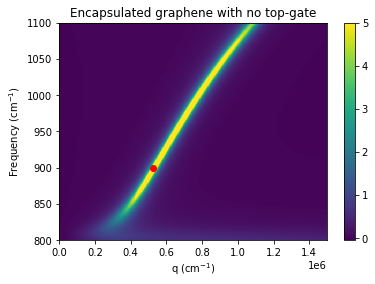

In [5]:
rp = stack.reflection_p(freqIn,qRangeIn)
plt.figure(); np.imag(rp.T).plot(vmax=5)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
G_encap_q = 522500; G_encap_w = 900;
plt.scatter([G_encap_q],[G_encap_w],color='red')    #on resonance
plt.title('Encapsulated graphene with no top-gate')

## 1D field profile

(freq and q specified at red dot)

Text(0.5,0.98,'Ez')

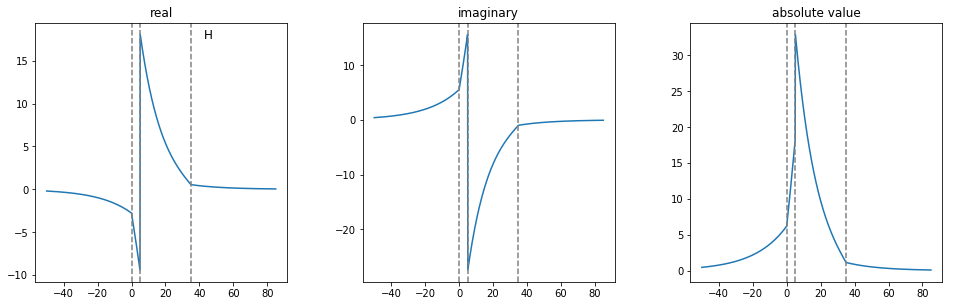

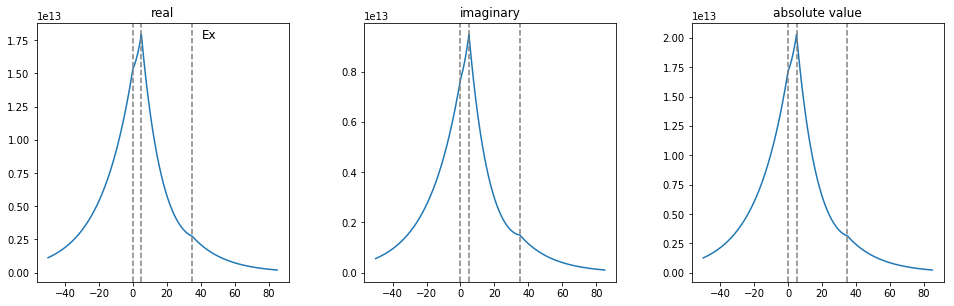

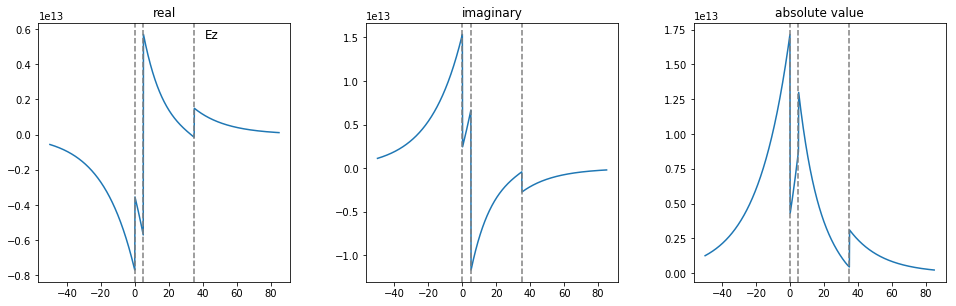

In [6]:
T = MatrixBuilder.TransferMatrix(stack, polarization='p')
C = Calculator.Calculator(T)
C.compute_field_profile(G_encap_w, G_encap_q, a=1., distance_into_entrance=50e-7,distance_into_exit=50e-7,num_sample=num_sample,
                        normalized=False)
Ez_array = C.get_Ez_field_profile()
Ex_array = C.get_Ex_field_profile()
H_array = C.get_H_field_profile()
plot_1d_Field(H_array)
plt.suptitle('H')
plot_1d_Field(Ex_array)
plt.suptitle('Ex')
plot_1d_Field(Ez_array)
plt.suptitle('Ez')

## 2D field profile

 (freq and q specified at red dot)

Text(0.5,0.98,'Encapsulated graphene with no top-gate, Ez')

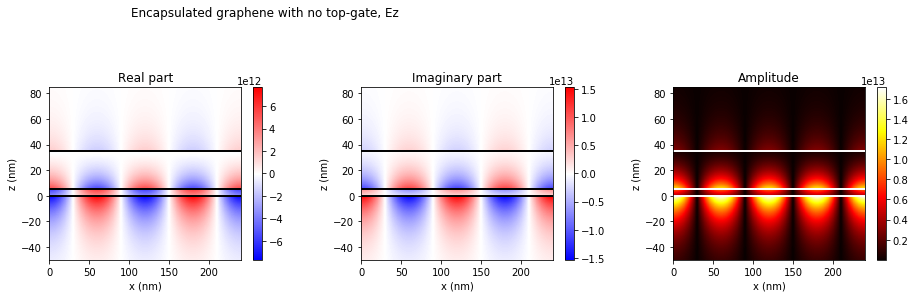

In [7]:
xRange = np.linspace(0,x_window_size*(2*np.pi/G_encap_q),num_sample)*1e7
yRange = Ez_array.axes[0]
field2d = C.get_2d_field_profile(G_encap_q,field_str='Ez',num_sample=num_sample,x_window_size = x_window_size)
imshow1x2(field2d,xRange,yRange)
plt.suptitle('Encapsulated graphene with no top-gate, Ez')